# Output Presentation

The objective of this notebook is to present in an interpretabel way the output of the best performing mode.


In [1]:
run init.ipynb

Done.


In [3]:
df =  pd.read_csv(AUTISM_DATA_PATH)
data = Dataset(df=df, 
               missing_data_handling='without', 
               imputation_method='without', 
               sampling_method='without',
               outcome_column='diagnosis',
                features_name = CVA_COLUMNS, 
                scale_data=True,
                use_missing_indicator_variables=False,
               verbosity=4,
               scenario=None,
               proportion_train=1)

Post-processing inital df (removing columns with no cva features, encoding srings, compute administrations order, compute condensed S/NS variables)... 
Predicting diagnosis based on 58 features
Splitting dataset into test and train set.


In [55]:
import shap 
explainer = shap.TreeExplainer(exp_ebm.model)
shap_values = explainer.shap_values(exp_ebm.dataset.X_train)

Exception: Model type not yet supported by TreeExplainer: <class 'interpret.glassbox.ebm.ebm.ExplainableBoostingClassifier'>

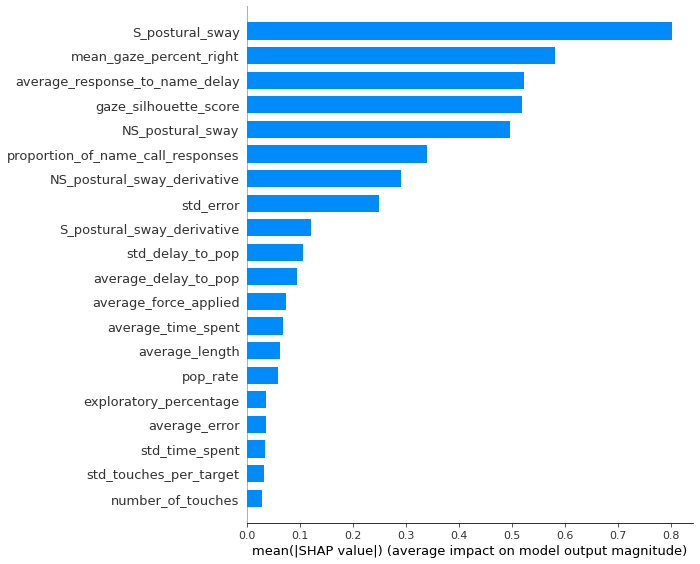

In [35]:
shap.summary_plot(shap_values, exp_ebm.dataset.X_train,  feature_names=features, plot_type="bar")


In [52]:
np.array(features)[np.argsort(np.abs(shap_values).sum(axis=0)).squeeze()]

array(['average_touches_per_target', 'number_of_target',
       'average_touch_duration', 'accuracy_consistency',
       'average_accuracy_variation', 'std_force_applied', 'std_length',
       'std_touch_duration', 'name_call_response_binary',
       'number_of_touches', 'std_touches_per_target', 'std_time_spent',
       'average_error', 'exploratory_percentage', 'pop_rate',
       'average_length', 'average_time_spent', 'average_force_applied',
       'average_delay_to_pop', 'std_delay_to_pop',
       'S_postural_sway_derivative', 'std_error',
       'NS_postural_sway_derivative', 'proportion_of_name_call_responses',
       'NS_postural_sway', 'gaze_silhouette_score',
       'average_response_to_name_delay', 'mean_gaze_percent_right',
       'S_postural_sway'], dtype='<U33')

In [50]:
np.argsort(np.abs(shap_values).sum(axis=0))

array([24, 14, 16, 23, 22, 21, 11, 17,  4,  9, 25, 27, 12, 28, 15, 10, 26,
       20, 18, 19,  7, 13,  8,  2,  6,  1,  3,  0,  5])

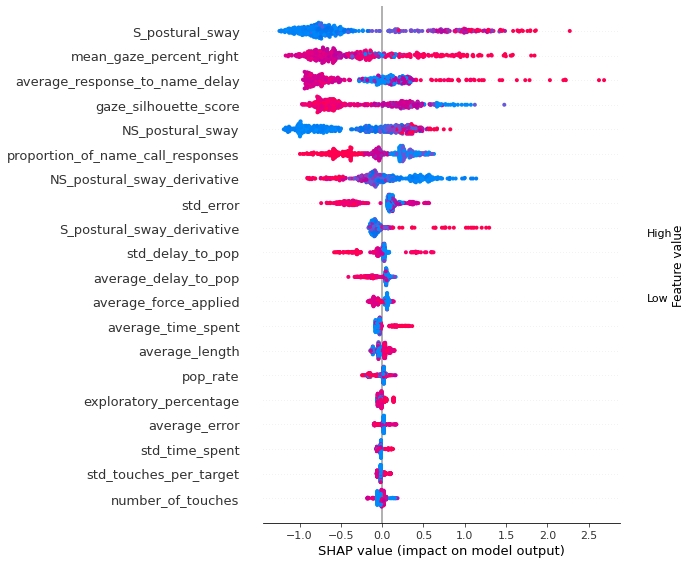

In [40]:
shap.summary_plot(shap_values, exp_ebm.dataset.X_train,  feature_names=features)


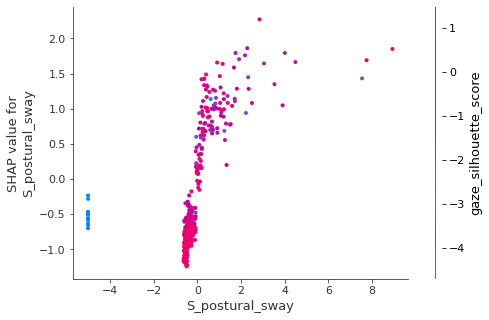

In [42]:
shap.dependence_plot("S_postural_sway", shap_values, exp_ebm.dataset.X_train, feature_names=features)
